# Alexander Peltier & Gabriel Aracena

# Gene Expression and Control/Treatment

Gene expression refers to how actively a gene is being transcribed to mRNA and then translated into proteins. The expression levels of genes can vary under different conditions, such as in response to treatment or environmental changes. 

In the context of this assignment, we compare the expression of a gene under two conditions: a control condition (no treatment) and a treatment condition (where cells, for example, are exposed to a specific drug or environmental change).

# Guassian Process (GP) Relevancy

A guassian process is a non-parametric Bayesian approach to regression and classification. In the context of time series analysis (what we are doing in this assignment) GP can model the continuous underlying function that generates the observed data, which is useful for gene expression data that varies over time.

GP involves defining a prior over functions - a mean function m(x) and a covariance function k(x, x') where x and x' are two points in the input space.

For gene expression data, x represents time, and the output would be the expression level at that time.

# How Guassian Process can be used in Linear Regression

GP can generalize linear regression by allowing for infinitely many functions to fit the data - rather than assuming a specific functional form (like a line). This is especially useful for modeling non-linear trends in gene expression over time.

# Implementation

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s05  0007  -9.443338e+00   4.809234e+01 
    00s10  0013  -1.047313e+01   1.812714e+00 
    00s10  0014  -1.054157e+01   1.035396e-02 
    00s14  0017  -1.054791e+01   1.379563e-07 
    00s16  0019  -1.054791e+01   4.979869e-09 
Runtime:     00s16
Optimization status: Converged



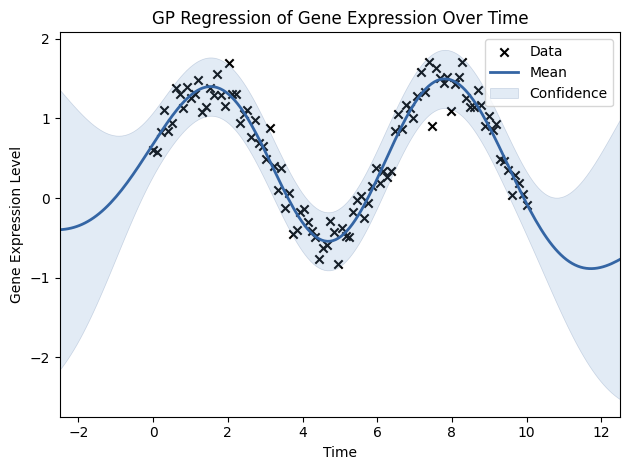

In [3]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

# Simulate some time series data for gene expression
np.random.seed(42)
times = np.linspace(0, 10, 100)[:, None]  # Time points
true_function = np.sin(times) + 0.5  # True function
observed_data = true_function + np.random.normal(0, 0.2, size=true_function.shape)  # Observed data with noise

# Define a GP model
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
model = GPy.models.GPRegression(times, observed_data, kernel)

model.optimize(messages=True)

model.plot()
plt.xlabel('Time')
plt.ylabel('Gene Expression Level')
plt.title('GP Regression of Gene Expression Over Time')
plt.show()
